# introduction 


the dataset is from kaggle you can get form this link https://www.kaggle.com/datasets/lava18/google-play-store-apps?resource=download.

## Questions

- what is the most exipensive app in the store?

- which genre has more apps?

- what is average size of the free apps & paid apps?

- how many apps that has more than 50k reviewrs?

- what is the top expensive apps that has rate of 5 ?

- what is the average price of the apps for each genre with installs numbers ?

- how many apps has rating > 4.7 and what is average price?

- how much google earned from the 5,000,000+ installed apps?

- what is the max and min size for free and paid apps?

- Is there a correlation between rating,reviews,size with prince of the app?

- how many apps that can work on android version 4?

- how many apps for each type of the content reading?


## imports 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

## load the data 

In [2]:
df=pd.read_csv("C:/Users/Ahmed/Downloads/data analysis projects/archive (1)/googleplaystore.csv")

In [3]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## data exploration 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.shape

(10841, 13)

In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

## data cleaning


### fix numeric data 

**fix reviews data**

In [7]:
df["Reviews"]=pd.to_numeric(df["Reviews"],errors="coerce")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**fix size data**


In [8]:
for i in  df["Size"].unique():
    print(i)

19M
14M
8.7M
25M
2.8M
5.6M
29M
33M
3.1M
28M
12M
20M
21M
37M
2.7M
5.5M
17M
39M
31M
4.2M
7.0M
23M
6.0M
6.1M
4.6M
9.2M
5.2M
11M
24M
Varies with device
9.4M
15M
10M
1.2M
26M
8.0M
7.9M
56M
57M
35M
54M
201k
3.6M
5.7M
8.6M
2.4M
27M
2.5M
16M
3.4M
8.9M
3.9M
2.9M
38M
32M
5.4M
18M
1.1M
2.2M
4.5M
9.8M
52M
9.0M
6.7M
30M
2.6M
7.1M
3.7M
22M
7.4M
6.4M
3.2M
8.2M
9.9M
4.9M
9.5M
5.0M
5.9M
13M
73M
6.8M
3.5M
4.0M
2.3M
7.2M
2.1M
42M
7.3M
9.1M
55M
23k
6.5M
1.5M
7.5M
51M
41M
48M
8.5M
46M
8.3M
4.3M
4.7M
3.3M
40M
7.8M
8.8M
6.6M
5.1M
61M
66M
79k
8.4M
118k
44M
695k
1.6M
6.2M
18k
53M
1.4M
3.0M
5.8M
3.8M
9.6M
45M
63M
49M
77M
4.4M
4.8M
70M
6.9M
9.3M
10.0M
8.1M
36M
84M
97M
2.0M
1.9M
1.8M
5.3M
47M
556k
526k
76M
7.6M
59M
9.7M
78M
72M
43M
7.7M
6.3M
334k
34M
93M
65M
79M
100M
58M
50M
68M
64M
67M
60M
94M
232k
99M
624k
95M
8.5k
41k
292k
11k
80M
1.7M
74M
62M
69M
75M
98M
85M
82M
96M
87M
71M
86M
91M
81M
92M
83M
88M
704k
862k
899k
378k
266k
375k
1.3M
975k
980k
4.1M
89M
696k
544k
525k
920k
779k
853k
720k
713k
772k
318k
58k
241k


In [9]:
def fix_size(s):
    try:
        #M
        if s[-1]=="M":
            return float (s[:-1])
        #k
        elif s[-1]=="k":
            return float (s[:-1])/1024
        #1,000+
        elif s=="1,000+":
            return 1.0
    except:
        return np.nan

In [10]:
print(fix_size("624k"))


0.609375


In [11]:
for i in  df["Size"].unique():
    print(i)

19M
14M
8.7M
25M
2.8M
5.6M
29M
33M
3.1M
28M
12M
20M
21M
37M
2.7M
5.5M
17M
39M
31M
4.2M
7.0M
23M
6.0M
6.1M
4.6M
9.2M
5.2M
11M
24M
Varies with device
9.4M
15M
10M
1.2M
26M
8.0M
7.9M
56M
57M
35M
54M
201k
3.6M
5.7M
8.6M
2.4M
27M
2.5M
16M
3.4M
8.9M
3.9M
2.9M
38M
32M
5.4M
18M
1.1M
2.2M
4.5M
9.8M
52M
9.0M
6.7M
30M
2.6M
7.1M
3.7M
22M
7.4M
6.4M
3.2M
8.2M
9.9M
4.9M
9.5M
5.0M
5.9M
13M
73M
6.8M
3.5M
4.0M
2.3M
7.2M
2.1M
42M
7.3M
9.1M
55M
23k
6.5M
1.5M
7.5M
51M
41M
48M
8.5M
46M
8.3M
4.3M
4.7M
3.3M
40M
7.8M
8.8M
6.6M
5.1M
61M
66M
79k
8.4M
118k
44M
695k
1.6M
6.2M
18k
53M
1.4M
3.0M
5.8M
3.8M
9.6M
45M
63M
49M
77M
4.4M
4.8M
70M
6.9M
9.3M
10.0M
8.1M
36M
84M
97M
2.0M
1.9M
1.8M
5.3M
47M
556k
526k
76M
7.6M
59M
9.7M
78M
72M
43M
7.7M
6.3M
334k
34M
93M
65M
79M
100M
58M
50M
68M
64M
67M
60M
94M
232k
99M
624k
95M
8.5k
41k
292k
11k
80M
1.7M
74M
62M
69M
75M
98M
85M
82M
96M
87M
71M
86M
91M
81M
92M
83M
88M
704k
862k
899k
378k
266k
375k
1.3M
975k
980k
4.1M
89M
696k
544k
525k
920k
779k
853k
720k
713k
772k
318k
58k
241k


In [12]:
df["Size"]=df["Size"].apply(fix_size)
df.head(100)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,All of the parking lot - National Park applica...,AUTO_AND_VEHICLES,4.0,1754.0,14.0,"500,000+",Free,0,Everyone,Auto & Vehicles,"June 2, 2018",2.3.4,4.0 and up
96,Inquiry Fines and Debits of Vehicles,AUTO_AND_VEHICLES,4.4,2680.0,2.2,"500,000+",Free,0,Everyone,Auto & Vehicles,"March 20, 2018",1.03,4.0.3 and up
97,Gas Station,AUTO_AND_VEHICLES,4.0,1288.0,4.5,"100,000+",Free,0,Everyone,Auto & Vehicles,"April 21, 2018",2.17,4.0 and up
98,Hush - Beauty for Everyone,BEAUTY,4.7,18900.0,17.0,"500,000+",Free,0,Everyone,Beauty,"August 2, 2018",6.10.1,5.0 and up


In [13]:
for i in  df["Size"].unique():
    print(i)
    

19.0
14.0
8.7
25.0
2.8
5.6
29.0
33.0
3.1
28.0
12.0
20.0
21.0
37.0
2.7
5.5
17.0
39.0
31.0
4.2
7.0
23.0
6.0
6.1
4.6
9.2
5.2
11.0
24.0
nan
9.4
15.0
10.0
1.2
26.0
8.0
7.9
56.0
57.0
35.0
54.0
0.1962890625
3.6
5.7
8.6
2.4
27.0
2.5
16.0
3.4
8.9
3.9
2.9
38.0
32.0
5.4
18.0
1.1
2.2
4.5
9.8
52.0
9.0
6.7
30.0
2.6
7.1
3.7
22.0
7.4
6.4
3.2
8.2
9.9
4.9
9.5
5.0
5.9
13.0
73.0
6.8
3.5
4.0
2.3
7.2
2.1
42.0
7.3
9.1
55.0
0.0224609375
6.5
1.5
7.5
51.0
41.0
48.0
8.5
46.0
8.3
4.3
4.7
3.3
40.0
7.8
8.8
6.6
5.1
61.0
66.0
0.0771484375
8.4
0.115234375
44.0
0.6787109375
1.6
6.2
0.017578125
53.0
1.4
3.0
5.8
3.8
9.6
45.0
63.0
49.0
77.0
4.4
4.8
70.0
6.9
9.3
8.1
36.0
84.0
97.0
2.0
1.9
1.8
5.3
47.0
0.54296875
0.513671875
76.0
7.6
59.0
9.7
78.0
72.0
43.0
7.7
6.3
0.326171875
34.0
93.0
65.0
79.0
100.0
58.0
50.0
68.0
64.0
67.0
60.0
94.0
0.2265625
99.0
0.609375
95.0
0.00830078125
0.0400390625
0.28515625
0.0107421875
80.0
1.7
74.0
62.0
69.0
75.0
98.0
85.0
82.0
96.0
87.0
71.0
86.0
91.0
81.0
92.0
83.0
88.0
0.6875
0.841796875
0.

**fix price data**

In [14]:
for i in df["Price"].unique():
    print(i)

0
$4.99
$3.99
$6.99
$1.49
$2.99
$7.99
$5.99
$3.49
$1.99
$9.99
$7.49
$0.99
$9.00
$5.49
$10.00
$24.99
$11.99
$79.99
$16.99
$14.99
$1.00
$29.99
$12.99
$2.49
$10.99
$1.50
$19.99
$15.99
$33.99
$74.99
$39.99
$3.95
$4.49
$1.70
$8.99
$2.00
$3.88
$25.99
$399.99
$17.99
$400.00
$3.02
$1.76
$4.84
$4.77
$1.61
$2.50
$1.59
$6.49
$1.29
$5.00
$13.99
$299.99
$379.99
$37.99
$18.99
$389.99
$19.90
$8.49
$1.75
$14.00
$4.85
$46.99
$109.99
$154.99
$3.08
$2.59
$4.80
$1.96
$19.40
$3.90
$4.59
$15.46
$3.04
$4.29
$2.60
$3.28
$4.60
$28.99
$2.95
$2.90
$1.97
$200.00
$89.99
$2.56
$30.99
$3.61
$394.99
$1.26
Everyone
$1.20
$1.04


In [15]:
def fix_price(s):
    try:
        # $
        if s[0]=="$":
            return float (s[1:])
        
        else:
            return 0.0    
    except:
        return np.nan

In [16]:
fix_price("$89.99")

89.99

In [17]:
df["Price"]=df["Price"].apply(fix_price)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


**exploring numeric data after cleaning**

In [19]:
df.describe()

,Rating,Reviews,Size,Price
count,9367.000000,1.084000e+04,9146.000000,10841.000000
mean,4.193338,4.441529e+05,21.513922,1.027273
std,0.537431,2.927761e+06,22.588868,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,19.000000,7.815831e+07,100.000000,400.000000


**remove outliers from Rating**

In [20]:
df[df["Rating"]>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,1.0,Free,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [21]:
df.drop(10472,axis =0,inplace=True)
df.describe()

,Rating,Reviews,Size,Price
count,9366.000000,1.084000e+04,9145.000000,10840.000000
mean,4.191757,4.441529e+05,21.516165,1.027368
std,0.515219,2.927761e+06,22.589084,15.949703
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


**fix catigorical data**

In [22]:
for i in df["Category"].unique():
    print(i)

ART_AND_DESIGN
AUTO_AND_VEHICLES
BEAUTY
BOOKS_AND_REFERENCE
BUSINESS
COMICS
COMMUNICATION
DATING
EDUCATION
ENTERTAINMENT
EVENTS
FINANCE
FOOD_AND_DRINK
HEALTH_AND_FITNESS
HOUSE_AND_HOME
LIBRARIES_AND_DEMO
LIFESTYLE
GAME
FAMILY
MEDICAL
SOCIAL
SHOPPING
PHOTOGRAPHY
SPORTS
TRAVEL_AND_LOCAL
TOOLS
PERSONALIZATION
PRODUCTIVITY
PARENTING
WEATHER
VIDEO_PLAYERS
NEWS_AND_MAGAZINES
MAPS_AND_NAVIGATION


In [23]:
def make_lower (d):
    return d.lower()

df["Category"]=df["Category"].apply(make_lower)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,art_and_design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,art_and_design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
for i in df["Category"].unique():
    print (i)

art_and_design
auto_and_vehicles
beauty
books_and_reference
business
comics
communication
dating
education
entertainment
events
finance
food_and_drink
health_and_fitness
house_and_home
libraries_and_demo
lifestyle
game
family
medical
social
shopping
photography
sports
travel_and_local
tools
personalization
productivity
parenting
weather
video_players
news_and_magazines
maps_and_navigation


In [25]:
for i in df["Installs"].unique():
    print (i)

10,000+
500,000+
5,000,000+
50,000,000+
100,000+
50,000+
1,000,000+
10,000,000+
5,000+
100,000,000+
1,000,000,000+
1,000+
500,000,000+
50+
100+
500+
10+
1+
5+
0+
0


In [26]:
for i in df["Type"].unique():
    print (i)

Free
Paid
nan


In [27]:
for i in df["Content Rating"].unique():
    print (i)

Everyone
Teen
Everyone 10+
Mature 17+
Adults only 18+
Unrated


In [28]:
df.drop(["Genres","Last Updated","Current Ver"],axis=1,inplace=True)
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,4.0.3 and up
1,Coloring book moana,art_and_design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,art_and_design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,4.4 and up


**creating a new column called check version**

In [29]:
for i in df["Android Ver"].unique():
    print(i)

4.0.3 and up
4.2 and up
4.4 and up
2.3 and up
3.0 and up
4.1 and up
4.0 and up
2.3.3 and up
Varies with device
2.2 and up
5.0 and up
6.0 and up
1.6 and up
1.5 and up
2.1 and up
7.0 and up
5.1 and up
4.3 and up
4.0.3 - 7.1.1
2.0 and up
3.2 and up
4.4W and up
7.1 and up
7.0 - 7.1.1
8.0 and up
5.0 - 8.0
3.1 and up
2.0.1 and up
4.1 - 7.1.1
nan
5.0 - 6.0
1.0 and up
2.2 - 7.1.1
5.0 - 7.1.1


In [30]:
def check_verison (d):
    try:
        if d.startswith("4"):
            return "yes"
        
        else: return "no"
          
    except:
        return np.nan

In [31]:
df["check_version"]=df["Android Ver"].apply(check_verison)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,check_version
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,4.0.3 and up,yes
1,Coloring book moana,art_and_design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,4.0.3 and up,yes
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,4.0.3 and up,yes
3,Sketch - Draw & Paint,art_and_design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,4.2 and up,yes
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,4.4 and up,yes


In [32]:
df["check_version"].value_counts()

yes    6959
no     3879
Name: check_version, dtype: int64

**handling missing values**

In [33]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Android Ver          2
check_version        2
dtype: int64

In [34]:
(df["Size"].isna().sum()/df.shape[0])*100

15.636531365313653

In [35]:
from sklearn.impute import KNNImputer

In [36]:
imputer=KNNImputer()

In [37]:
df["Size"]=imputer.fit_transform(df[["Size"]])

In [38]:
df["Rating"]=imputer.fit_transform(df[["Rating"]])

In [39]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Android Ver       2
check_version     2
dtype: int64

In [40]:
from sklearn.impute import SimpleImputer

In [41]:
clean_data=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
                         

In [42]:
df["Type"]=clean_data.fit_transform(df[["Type"]])

In [43]:
df["check_version"]=clean_data.fit_transform(df[["check_version"]])

In [44]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Android Ver       2
check_version     0
dtype: int64

In [45]:
df.describe()

,Rating,Reviews,Size,Price
count,10840.000000,1.084000e+04,10840.000000,10840.000000
mean,4.191757,4.441529e+05,21.516165,1.027368
std,0.478907,2.927761e+06,20.747804,15.949703
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.100000,3.800000e+01,5.900000,0.000000
50%,4.200000,2.094000e+03,18.000000,0.000000
75%,4.500000,5.477550e+04,26.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


**detect ourtliers by 2 steps**

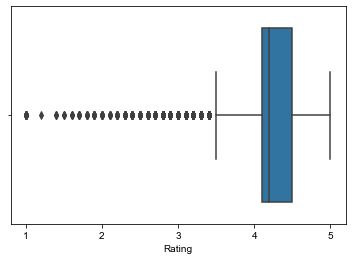

In [46]:
sns.boxplot(x="Rating",data=df)
sns.set(rc={"figure.figsize":[9,9]},font_scale=1.2)

**step 1**


**data < Q1 − 1.5 × IQR or
data > Q3 + 1.5 × IQR**

In [47]:
from scipy.stats import iqr
IQR=iqr(df['Rating'])

In [48]:
lower_threshold = np.quantile(df['Rating'], 0.25) - 1.5 * IQR
upper_threshold = np.quantile(df['Rating'], 0.75) + 1.5 * IQR
Rating_outliers=df[(df['Rating'] < lower_threshold) | (df['Rating'] > upper_threshold)]
Rating_outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,check_version
15,Learn To Draw Kawaii Characters,art_and_design,3.2,55.0,2.700000,"5,000+",Free,0.0,Everyone,4.2 and up,yes
87,RST - Sale of cars on the PCT,auto_and_vehicles,3.2,250.0,1.100000,"100,000+",Free,0.0,Everyone,4.0.3 and up,yes
159,Cloud of Books,books_and_reference,3.3,1862.0,19.000000,"1,000,000+",Free,0.0,Everyone,4.1 and up,yes
176,Free Book Reader,books_and_reference,3.4,1680.0,4.000000,"100,000+",Free,0.0,Everyone,4.0.3 and up,yes
209,Plugin:AOT v5.0,business,3.1,4034.0,0.022461,"100,000+",Free,0.0,Everyone,2.2 and up,no
...,...,...,...,...,...,...,...,...,...,...,...
10757,Fisher-Price® Smart Connect™,tools,2.7,422.0,72.000000,"50,000+",Free,0.0,Everyone,4.4 and up,yes
10765,Chat For Strangers - Video Chat,social,3.4,622.0,21.516165,"100,000+",Free,0.0,Mature 17+,Varies with device,no
10766,FreedomPop Diagnostics,tools,2.9,452.0,7.000000,"100,000+",Free,0.0,Everyone,4.0.3 and up,yes
10819,Fanfic-FR,books_and_reference,3.3,52.0,3.600000,"5,000+",Free,0.0,Teen,4.1 and up,yes


**step 2**

In [49]:
from datasist.structdata import detect_outliers
idx=detect_outliers(df,0,["Rating","Reviews","Size","Price"])
idx

[15,
 87,
 159,
 176,
 209,
 311,
 312,
 325,
 477,
 492,
 501,
 510,
 513,
 514,
 518,
 520,
 522,
 527,
 528,
 533,
 546,
 549,
 554,
 555,
 572,
 578,
 588,
 611,
 619,
 625,
 645,
 663,
 678,
 681,
 684,
 694,
 696,
 862,
 869,
 885,
 915,
 1056,
 1057,
 1186,
 1190,
 1213,
 1217,
 1263,
 1472,
 1491,
 1528,
 1548,
 1561,
 1571,
 1576,
 1591,
 1594,
 1782,
 1784,
 2087,
 2249,
 2260,
 2264,
 2266,
 2295,
 2300,
 2317,
 2327,
 2329,
 2337,
 2351,
 2355,
 2360,
 2387,
 2403,
 2408,
 2411,
 2412,
 2428,
 2487,
 2492,
 2517,
 2521,
 2531,
 2535,
 2702,
 2824,
 3001,
 3021,
 3023,
 3034,
 3131,
 3133,
 3137,
 3139,
 3146,
 3165,
 3247,
 3250,
 3262,
 3268,
 3271,
 3273,
 3279,
 3460,
 3483,
 3698,
 3709,
 3741,
 3748,
 3891,
 3938,
 3955,
 3961,
 3962,
 3963,
 3972,
 3979,
 4006,
 4010,
 4062,
 4066,
 4078,
 4127,
 4135,
 4161,
 4164,
 4165,
 4168,
 4171,
 4181,
 4187,
 4194,
 4209,
 4210,
 4226,
 4230,
 4251,
 4253,
 4258,
 4331,
 4361,
 4373,
 4375,
 4386,
 4389,
 4392,
 4470,
 4492,


In [50]:
outliers=df.loc[idx]
#clean_outliers
df.drop(idx,axis=0)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,check_version
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.100000,159.0,19.000000,"10,000+",Free,0.0,Everyone,4.0.3 and up,yes
1,Coloring book moana,art_and_design,3.900000,967.0,14.000000,"500,000+",Free,0.0,Everyone,4.0.3 and up,yes
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.700000,87510.0,8.700000,"5,000,000+",Free,0.0,Everyone,4.0.3 and up,yes
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.300000,967.0,2.800000,"100,000+",Free,0.0,Everyone,4.4 and up,yes
5,Paper flowers instructions,art_and_design,4.400000,167.0,5.600000,"50,000+",Free,0.0,Everyone,2.3 and up,no
...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,business,4.191757,0.0,9.600000,10+,Free,0.0,Everyone,4.0 and up,yes
10836,Sya9a Maroc - FR,family,4.500000,38.0,53.000000,"5,000+",Free,0.0,Everyone,4.1 and up,yes
10837,Fr. Mike Schmitz Audio Teachings,family,5.000000,4.0,3.600000,100+,Free,0.0,Everyone,4.1 and up,yes
10838,Parkinson Exercices FR,medical,4.191757,3.0,9.500000,"1,000+",Free,0.0,Everyone,2.2 and up,no


In [51]:
#what is the most exipensive app in the store?
df["Price"].max()

400.0

In [52]:
df[df["Price"]==df["Price"].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,check_version
4367,I'm Rich - Trump Edition,lifestyle,3.6,275.0,7.3,"10,000+",Paid,400.0,Everyone,4.1 and up,yes


In [53]:
sns.set(rc={"figure.figsize":[9,9]},font_scale=1.2)

<AxesSubplot:xlabel='count', ylabel='Category'>

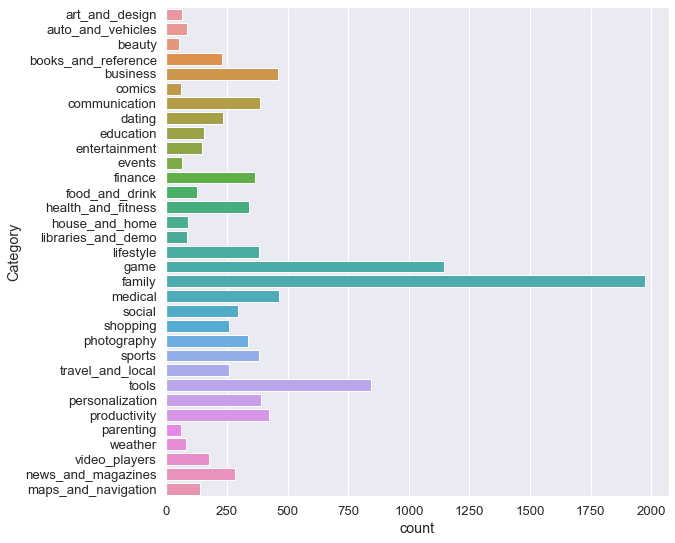

In [54]:
#which genre has more apps?
df["Category"].value_counts()
sns.countplot(y="Category",data=df)

In [55]:
#what is average size of the free apps & paid apps?
df.groupby("Type")["Size"].mean()

Type
Free    21.675505
Paid    19.516453
Name: Size, dtype: float64

In [56]:
#what is the top expensive apps that has rate of 5 ?
df[(df["Rating"]==5)].sort_values("Price",ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,check_version
5489,AP Art History Flashcards,family,5.0,1.0,96.000000,10+,Paid,29.99,Mature 17+,4.0 and up,yes
7477,USMLE Step 2 CK Flashcards,family,5.0,1.0,40.000000,10+,Paid,19.99,Everyone,2.2 and up,no
5246,Hey AJ! It's Bedtime!,family,5.0,1.0,63.000000,10+,Paid,4.99,Everyone,2.3 and up,no
7204,TI-84 CE Graphing Calculator Manual TI 84,family,5.0,1.0,27.000000,100+,Paid,4.99,Everyone,4.1 and up,yes
5482,meStudying: AP English Lit,family,5.0,1.0,0.639648,10+,Paid,4.99,Everyone,2.0.1 and up,no


In [57]:
#how many apps that has more than 50k reviewrs?
df[df["Reviews"]>50000].shape[0]

2782

In [58]:
#what is the average price of the apps for each genre with installs numbers ?
df.groupby(["Category","Installs"])["Price"].mean()

Category        Installs   
art_and_design  0+             0.000000
                1,000+         0.663333
                1,000,000+     0.000000
                10,000+        0.180909
                10,000,000+    0.000000
                                 ...   
weather         5,000,000+     0.000000
                50,000+        0.000000
                50,000,000+    0.000000
                500+           1.660000
                500,000+       0.855714
Name: Price, Length: 515, dtype: float64

In [59]:
#how many apps has rating > 4.7 and what is average price?
df[(df["Rating"]>4.7)]["Price"].mean()

0.5018487394957988

In [60]:
#how much google earned from the 5,000,000+ installed apps?
df[df["Installs"]=="5,000,000+"]["Price"].sum()

0.0

In [61]:
#what is the max and min size for free and paid apps?
df.groupby("Type")["Size"].agg([np.min,np.max])

,amin,amax
Type,,
Free,0.008301,100.0
Paid,0.013672,100.0


In [62]:
#what is the max and min size for free and paid apps?
df.groupby("Type")["Size"].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,10040.0,21.675505,20.714101,0.008301,6.1,19.0,26.0,100.0
Paid,800.0,19.516453,21.077113,0.013672,3.4,13.0,25.0,100.0


<AxesSubplot:xlabel='Type', ylabel='Size'>

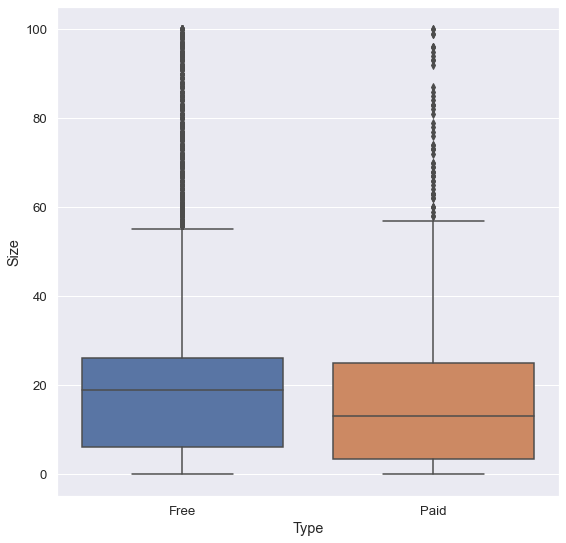

In [63]:
sns.boxplot(x="Type",y="Size",data=df)

In [64]:
#Is there a correlation between rating,reviews,size with prince of the app?
df.corr()

,Rating,Reviews,Size,Price
Rating,1.000000,0.068018,0.074864,-0.020190
Reviews,0.068018,1.000000,0.128255,-0.009667
Size,0.074864,0.128255,1.000000,-0.022995
Price,-0.020190,-0.009667,-0.022995,1.000000


In [65]:
df.corr()["Price"]

Rating    -0.020190
Reviews   -0.009667
Size      -0.022995
Price      1.000000
Name: Price, dtype: float64

<AxesSubplot:>

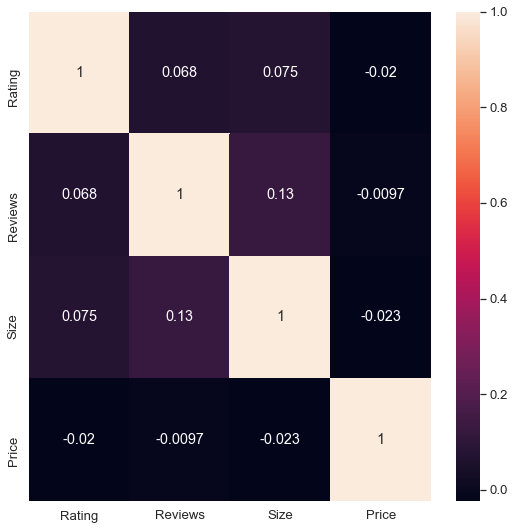

In [66]:
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),data=df,annot=True)



In [67]:
#how many apps that can work on android version 4?
df[df["check_version"]=="yes"].count()

App               6961
Category          6961
Rating            6961
Reviews           6961
Size              6961
Installs          6961
Type              6961
Price             6961
Content Rating    6961
Android Ver       6959
check_version     6961
dtype: int64

In [68]:
#how many apps for each type of the Content Rating?
pd.pivot_table(index="Type",columns="Content Rating",values="Rating",aggfunc="count",data=df)

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,3.0,8019.0,381.0,479.0,1156.0,2.0
Paid,NaN,695.0,33.0,20.0,52.0,NaN


In [69]:
df.groupby("Content Rating")["Rating"].count()

Content Rating
Adults only 18+       3
Everyone           8714
Everyone 10+        414
Mature 17+          499
Teen               1208
Unrated               2
Name: Rating, dtype: int64